In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
class Bandit:
    def __init__(self, p: float):
        self.p = p  # win rate
        self.p_estimate = 0
        self.N = 0 
    
    def pull(self):
        # Draw a 1 with probability p
        return np.random.random() < self.p

    def update(self, x):
        self.N += 1
        self.p_estimate = self.p_estimate + (x - self.p_estimate) / self.N

In [40]:
def experiment(eps=0.1, num_trials=10000, bandit_probabilities=[0.2, 0.5, 0.75], decay=None):
    bandits = [Bandit(p) for p in bandit_probabilities]
    n_bandits = len(bandits)
    rewards = np.zeros(num_trials)
    num_times_explored = 0
    num_times_exploited = 0
    num_optimal = 0
    optimal_j = np.argmax([b.p for b in bandits])
    print(f'Optimal bandit: {optimal_j}')
    for i in range(num_trials):
        # Use epsilon-greedy to select the next bandit
        if np.random.random() < eps:
            num_times_explored += 1
            j = np.random.randint(0, n_bandits)
        else:
            num_times_exploited += 1
            j = np.argmax([b.p_estimate for b in bandits])
        if j == optimal_j:
            num_optimal += 1
        # Pull the arm for the bandit choosen
        x = bandits[j].pull()
        # Update the rewards log
        rewards[i] = x
        # Update the distribution for the chosen bandit
        bandits[j].update(x)
        # Decay the eps 
        if decay:
            eps = decay(eps, i + 1)

    # Print the mean estimates for each bandit
    for i, bandit in enumerate(bandits):
        print(f'Mean estimate of bandit {i}: {bandit.p_estimate:.4f}')

    # Print total reward
    print(f"Total reward earned: {rewards.sum()}")
    print(f"Overall win rate: {rewards.sum() / NUM_TRIALS}")
    print(f"Num_times_explored: {num_times_explored}")
    print(f"Num_times_exploited: {num_times_exploited}")
    print(f"Num times selected optimal bandit: {num_optimal}")
    
    # plot the results
    cumulative_rewards = np.cumsum(rewards)
    win_rates = cumulative_rewards / (np.arange(num_trials) + 1)
    plt.figure(figsize=(15, 8))
    plt.plot(win_rates)
    plt.plot(np.ones(num_trials) * np.max(bandit_probabilities))
    plt.show()

In [66]:
def linear_decay(eps, N):
    return eps / N

def setup_alpha_decay(alpha=0.2):
    def alpha_decay(eps, N):
        return eps * alpha**N
    return alpha_decay 

def setup_max_decay(k, eps_0=1.0, eps_min=0.01):
    def max_decay(eps, N):
        return max(eps_0 - k * N, eps_min)
    return max_decay 

def setup_log_decay(a, b):
    def log_decay(eps, N):
        return a / np.log(b * N + eps)
    return log_decay

Optimal bandit: 2
Mean estimate of bandit 0: 0.0000
Mean estimate of bandit 1: 0.6000
Mean estimate of bandit 2: 0.7540
Total reward earned: 7538.0
Overall win rate: 0.7538
Num_times_explored: 4
Num_times_exploited: 9996
Num times selected optimal bandit: 9993


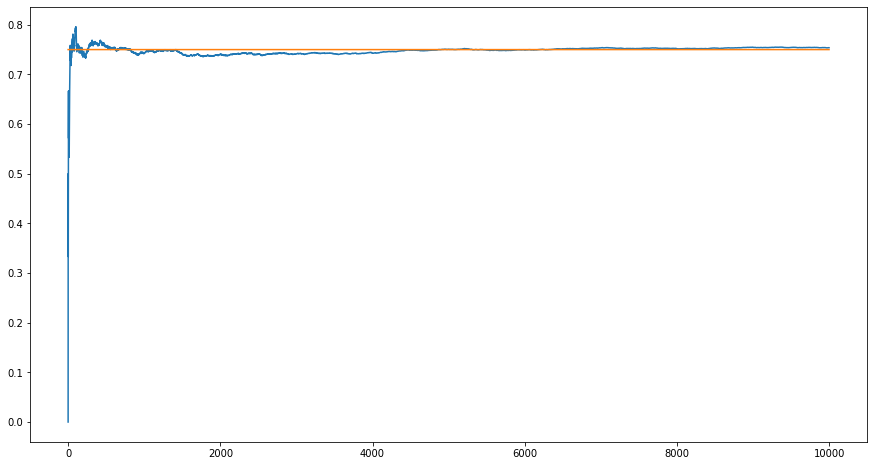

In [64]:
experiment(eps=10.0, decay=linear_decay)

Optimal bandit: 2
Mean estimate of bandit 0: 0.3333
Mean estimate of bandit 1: 0.6087
Mean estimate of bandit 2: 0.7506
Total reward earned: 7500.0
Overall win rate: 0.75
Num_times_explored: 9
Num_times_exploited: 9991
Num times selected optimal bandit: 9971


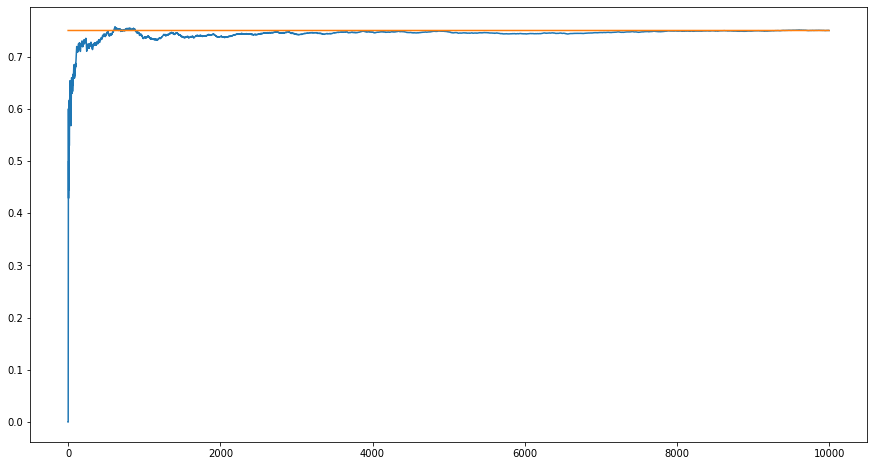

In [62]:
experiment(eps=0.75, decay=setup_alpha_decay(0.99))

Optimal bandit: 2
Mean estimate of bandit 0: 0.2136
Mean estimate of bandit 1: 0.6429
Mean estimate of bandit 2: 0.7428
Total reward earned: 7369.0
Overall win rate: 0.7369
Num_times_explored: 114
Num_times_exploited: 9886
Num times selected optimal bandit: 9855


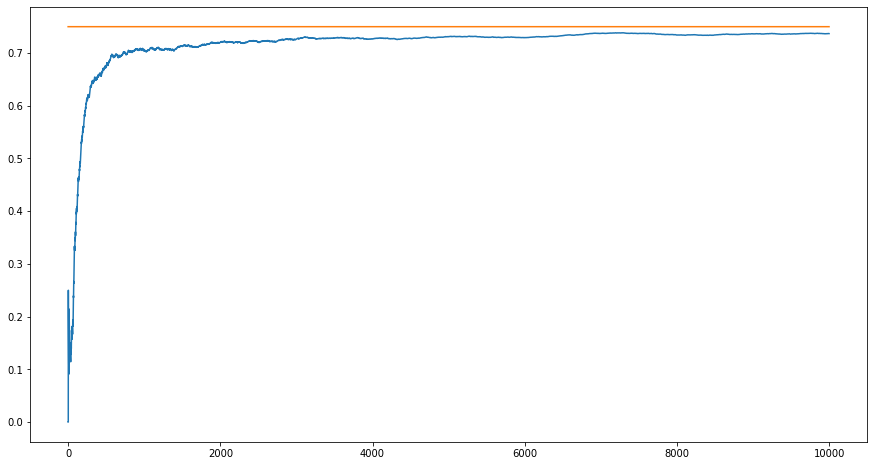

In [70]:
experiment(eps=0.75, decay=setup_max_decay(0.9))

Optimal bandit: 2
Mean estimate of bandit 0: 0.2190
Mean estimate of bandit 1: 0.5000
Mean estimate of bandit 2: 0.7572
Total reward earned: 7311.0
Overall win rate: 0.7311
Num_times_explored: 1016
Num_times_exploited: 8984
Num times selected optimal bandit: 9329


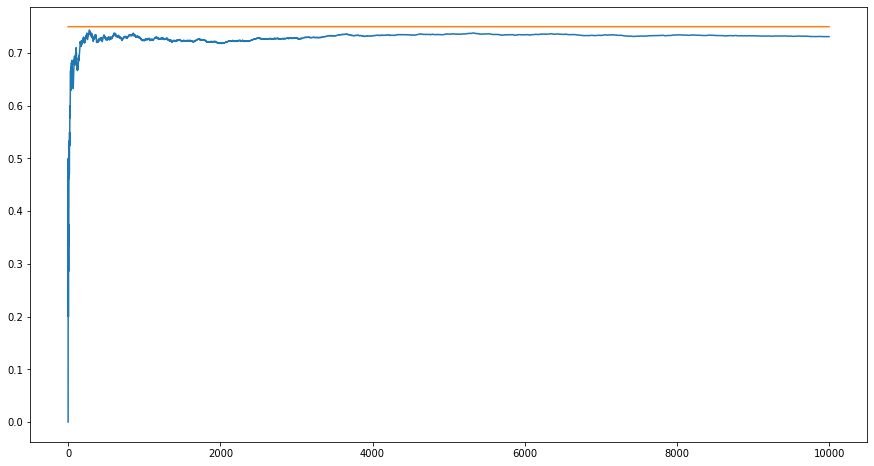

In [63]:
experiment(0.1)

Optimal j: 2
Mean estimate of bandit 0: 0.1143
Mean estimate of bandit 1: 0.5152
Mean estimate of bandit 2: 0.7515
Total reward earned: 7485.0
Overall win rate: 0.7485
Num_times_explored: 89
Num_times_exploited: 9911
Num times selected optimal bandit: 9932


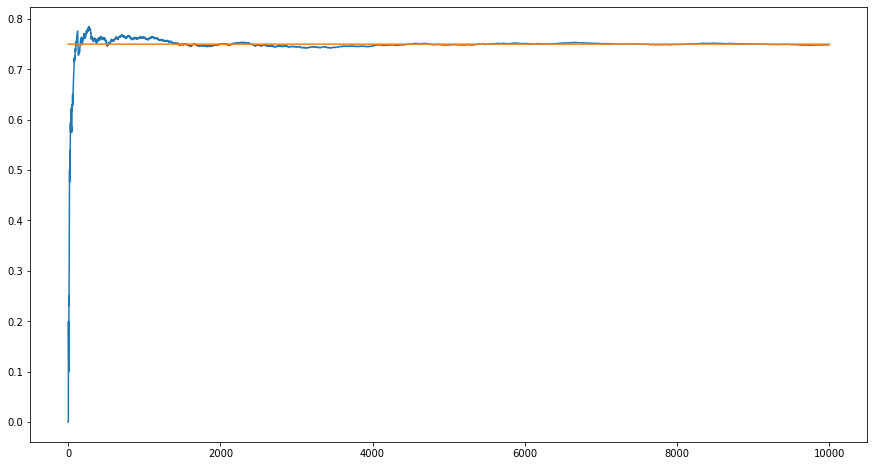

In [32]:
experiment(0.01)